<a href="https://colab.research.google.com/github/kevyngustavo/portifolio/blob/soil-nutrients-analysis/data-analysis/soil_nutrients_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and config

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
snmahsa_soil_nutrients_path = kagglehub.dataset_download('snmahsa/soil-nutrients')

print('Data source import complete.')

100%|██████████| 1.27M/1.27M [00:00<00:00, 29.6MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(snmahsa_soil_nutrients_path):
    for filename in filenames:
        file_dir = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
# Import libs
# Import matplotlib for graphic and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

## General data analysis

In [4]:
# Load file
file_path = file_dir
df = pd.read_csv(file_path)

In [5]:
# Extract data
df_name = df.groupby("Name")

In [6]:
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0


In [7]:
# Check for missing values
df.isnull().sum()

,0
Name,0
Fertility,0
Photoperiod,0
Temperature,0
Rainfall,0
pH,0
Light_Hours,0
Light_Intensity,0
Rh,0
Nitrogen,0


In [8]:
# Check data types
df.dtypes

,0
Name,object
Fertility,object
Photoperiod,object
Temperature,float64
Rainfall,float64
pH,float64
Light_Hours,float64
Light_Intensity,float64
Rh,float64
Nitrogen,float64


In [9]:
# DF describe
df.describe()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,N_Ratio,P_Ratio,K_Ratio
count,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000
mean,20.801671,948.814222,6.473372,9.459365,398.048832,67.117251,142.769483,107.659893,180.481105,22.749990,12.636364,11.704545,12.477273
std,4.415164,340.884493,0.449111,2.588466,190.512173,19.005233,58.524592,72.778284,103.989340,15.541414,14.028173,5.761853,7.805376
min,9.355908,409.927161,4.888871,5.044913,69.146572,29.877266,41.725552,13.155191,34.982329,0.770213,5.000000,10.000000,5.000000
25%,17.915142,707.799164,6.245973,7.017129,265.438161,53.009874,117.631453,57.627430,107.263425,11.978009,10.000000,10.000000,10.000000
50%,19.929578,846.623453,6.466286,8.985917,385.299681,63.248496,140.524941,87.731849,163.891242,21.232615,10.000000,10.000000,10.000000
75%,22.936714,1109.157262,6.697254,12.019180,508.211962,89.996774,160.186895,145.298926,223.236991,28.812111,10.000000,10.000000,10.000000
max,39.913892,2508.052849,8.023210,15.918024,985.186247,99.927439,409.639573,360.043619,579.953931,66.619242,75.000000,37.500000,37.500000


## Relationship between Yield and type culture

In [27]:
# Extract data
df_by_yield = df_name["Yield"].agg(["mean", "median", "min", "max", "var", "std"]).reset_index().sort_values(by="mean")

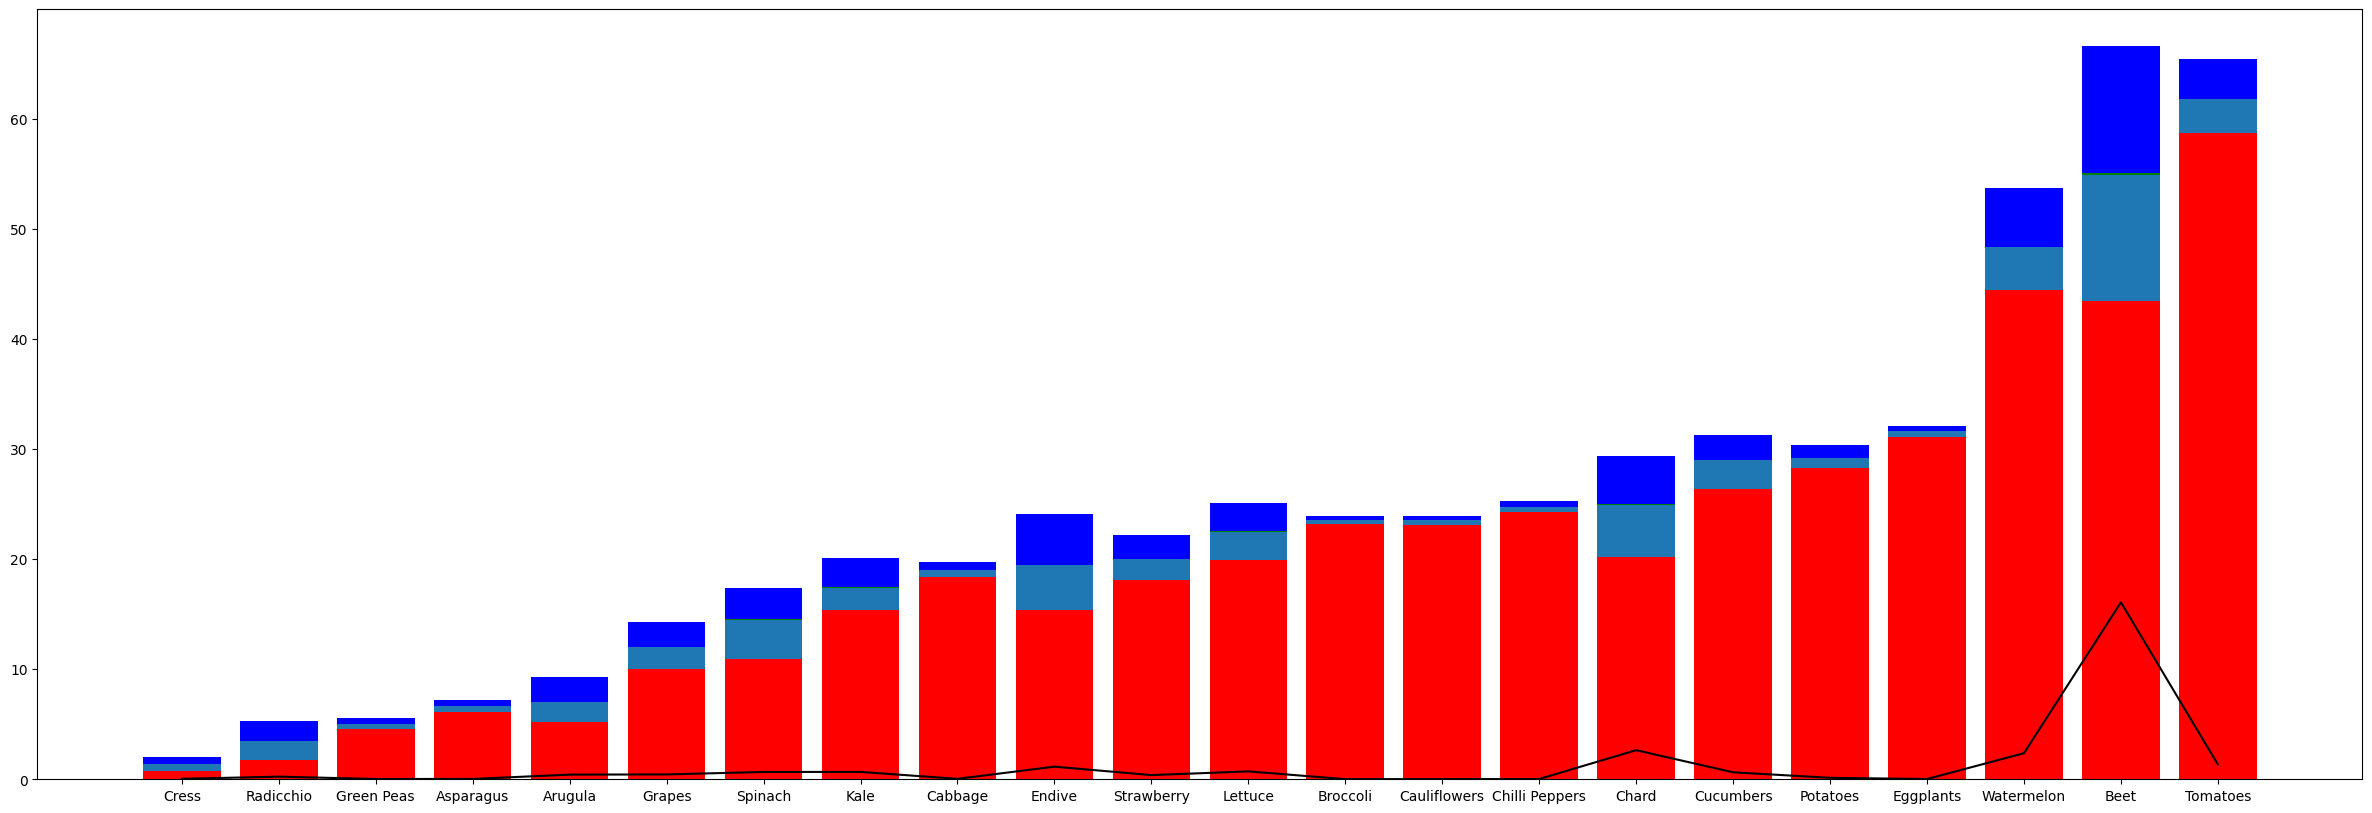

In [30]:
# Plot graph data by all columns on df_by_yield
plt.figure(figsize=(30,10))
plt.bar(df_by_yield["Name"],df_by_yield["max"],color="blue")
plt.bar(df_by_yield["Name"],df_by_yield["mean"],color="green")
plt.bar(df_by_yield["Name"],df_by_yield["median"])
plt.bar(df_by_yield["Name"],df_by_yield["min"],color="red")
plt.plot(df_by_yield["Name"],df_by_yield["var"],color="black")
plt.show()


## Relationship between temperature and type of vegetable


In [ ]:
# Extract mean, median, min and max by dataset
info_temp_veg = df_name["Temperature"].agg(["mean","median","min","max", "var"]).reset_index().sort_values(by="mean")
info_temp_veg

,Name,mean,median,min,max,var
18,Spinach,16.408682,16.413934,12.040658,20.550860,1.321870
15,Lettuce,16.569753,16.622288,11.496011,20.800492,2.289382
13,Green Peas,16.973783,16.973732,10.953752,24.250682,4.755804
5,Cauliflowers,17.504489,17.573402,9.355908,24.412770,6.066682
8,Cress,17.535822,17.538428,13.937408,20.883455,1.390140
19,Strawberry,17.560383,17.568389,11.489595,24.785126,4.967360
14,Kale,18.404531,18.371885,14.181235,22.640266,1.518112
11,Endive,18.996345,18.994087,15.407189,23.342516,1.739856
4,Cabbage,19.404829,19.425900,14.114100,23.691106,2.217181
3,Broccoli,19.491472,19.471375,17.942199,21.203017,0.254947


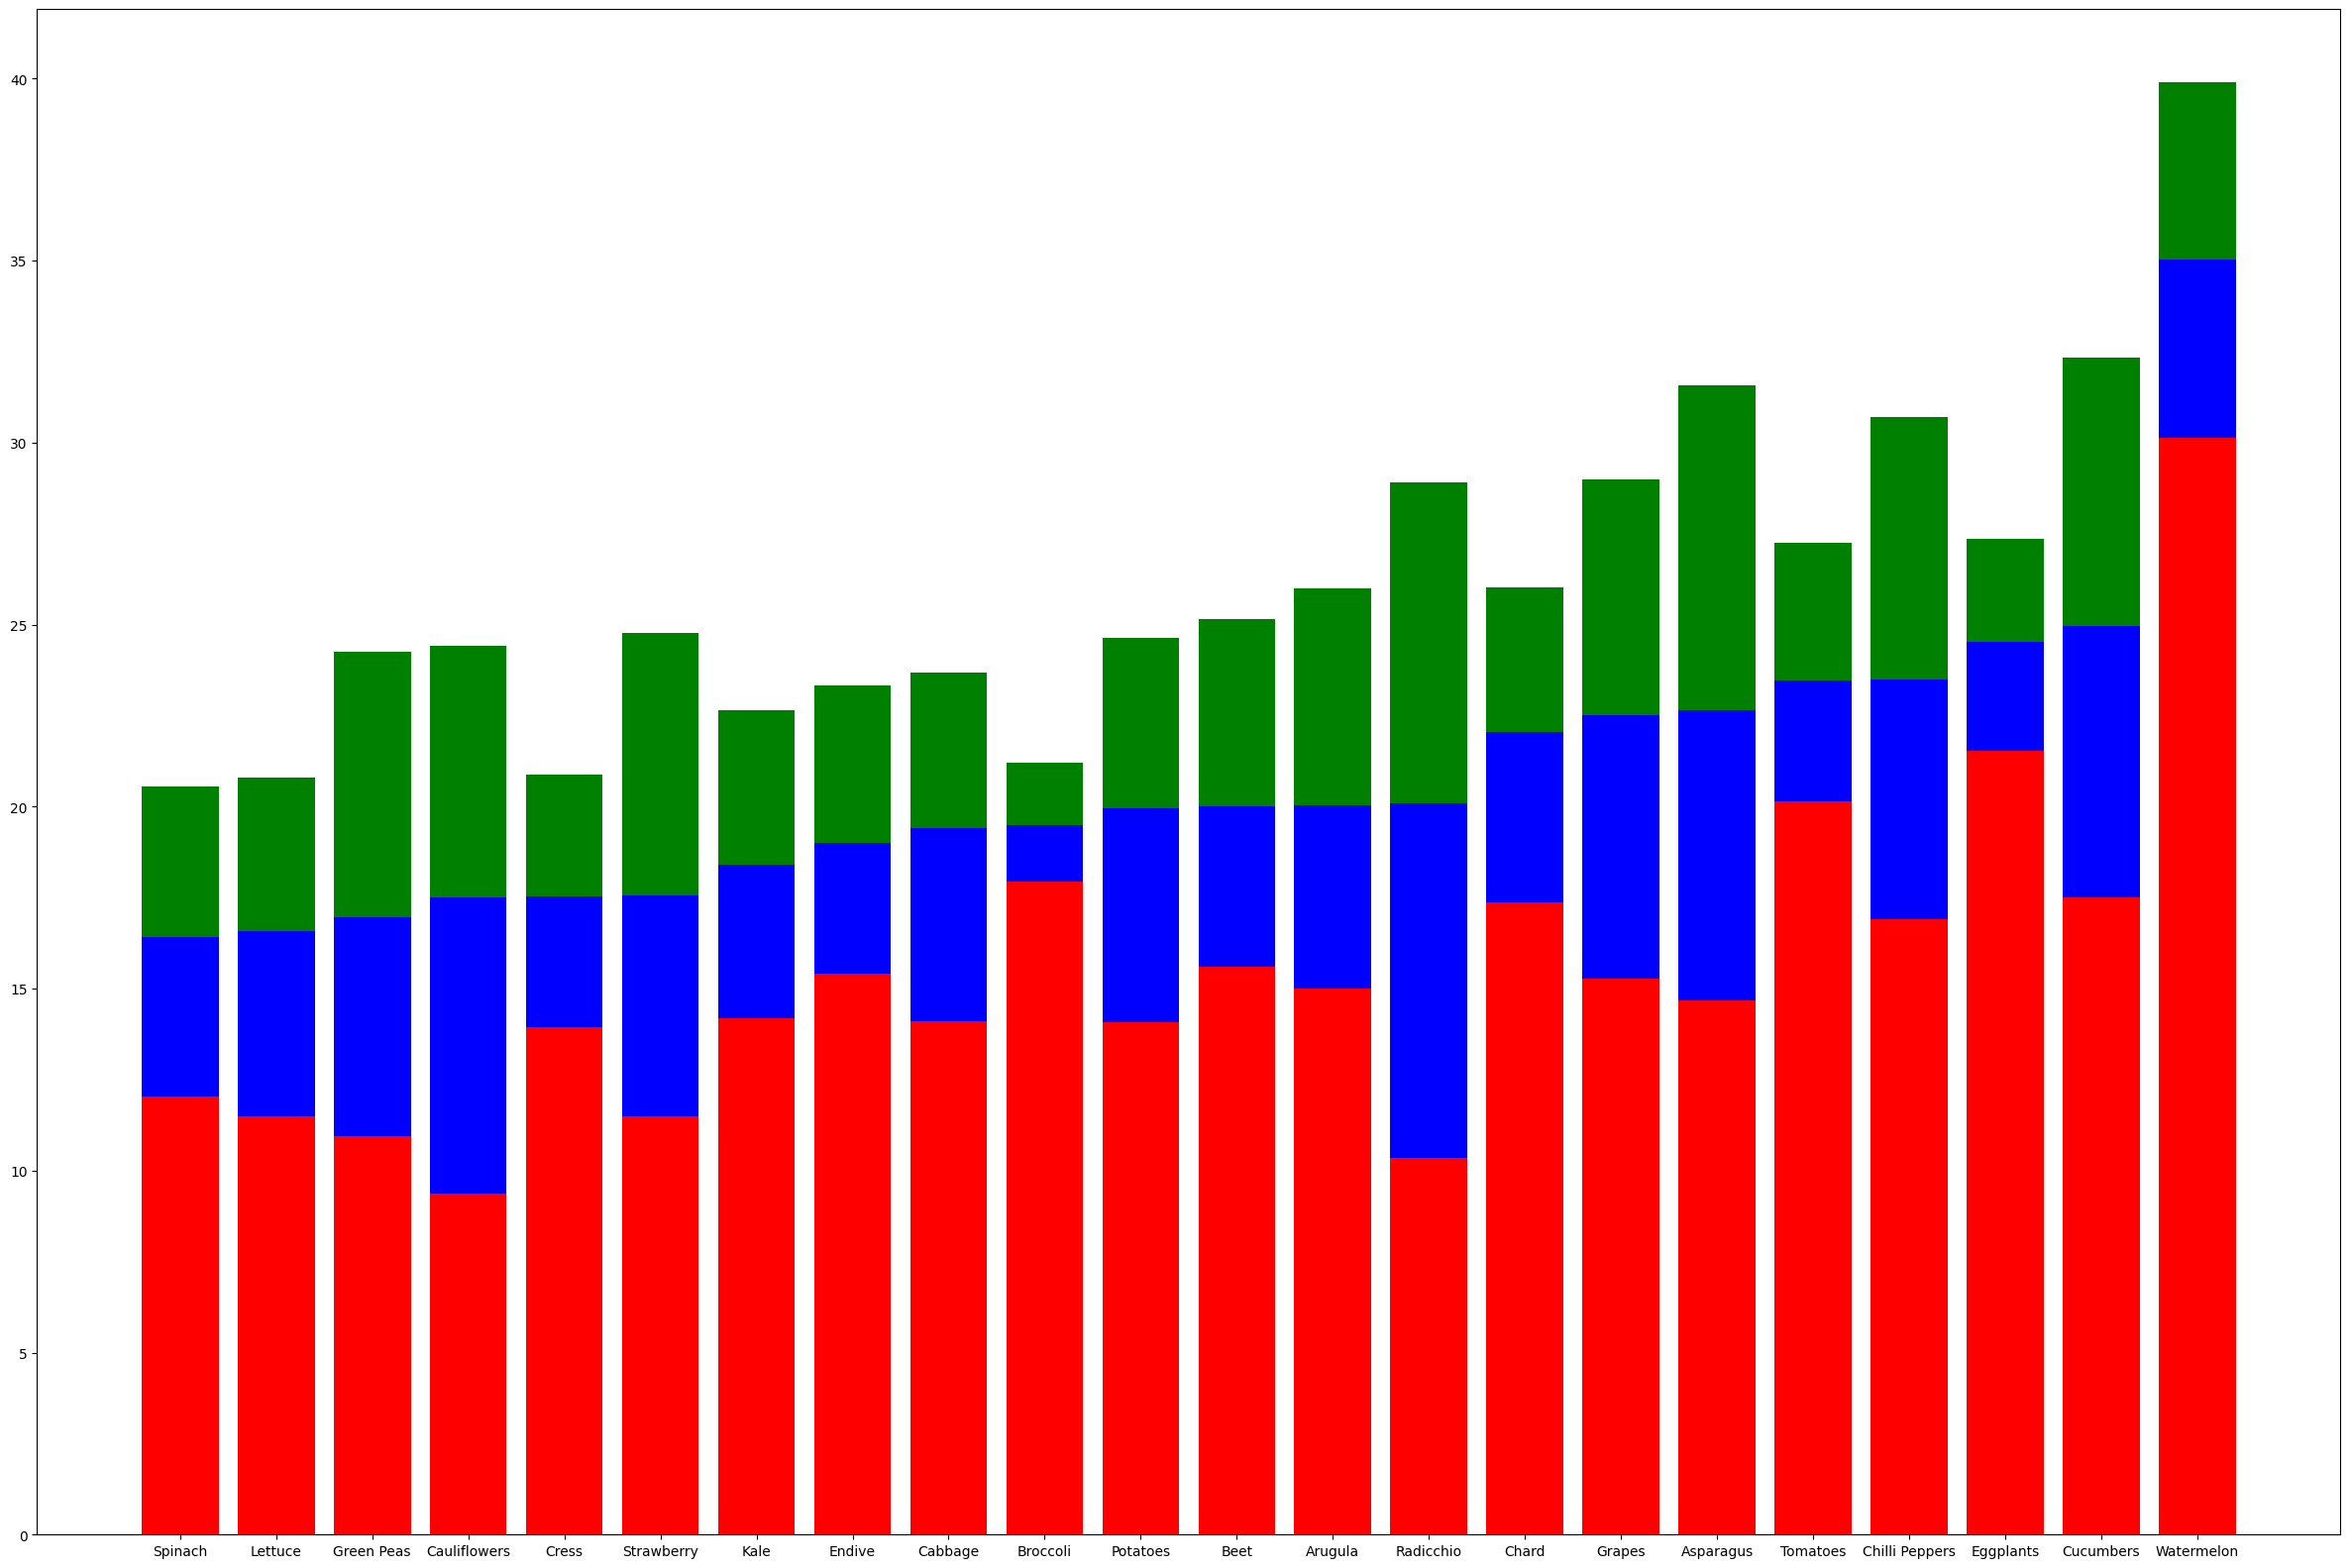

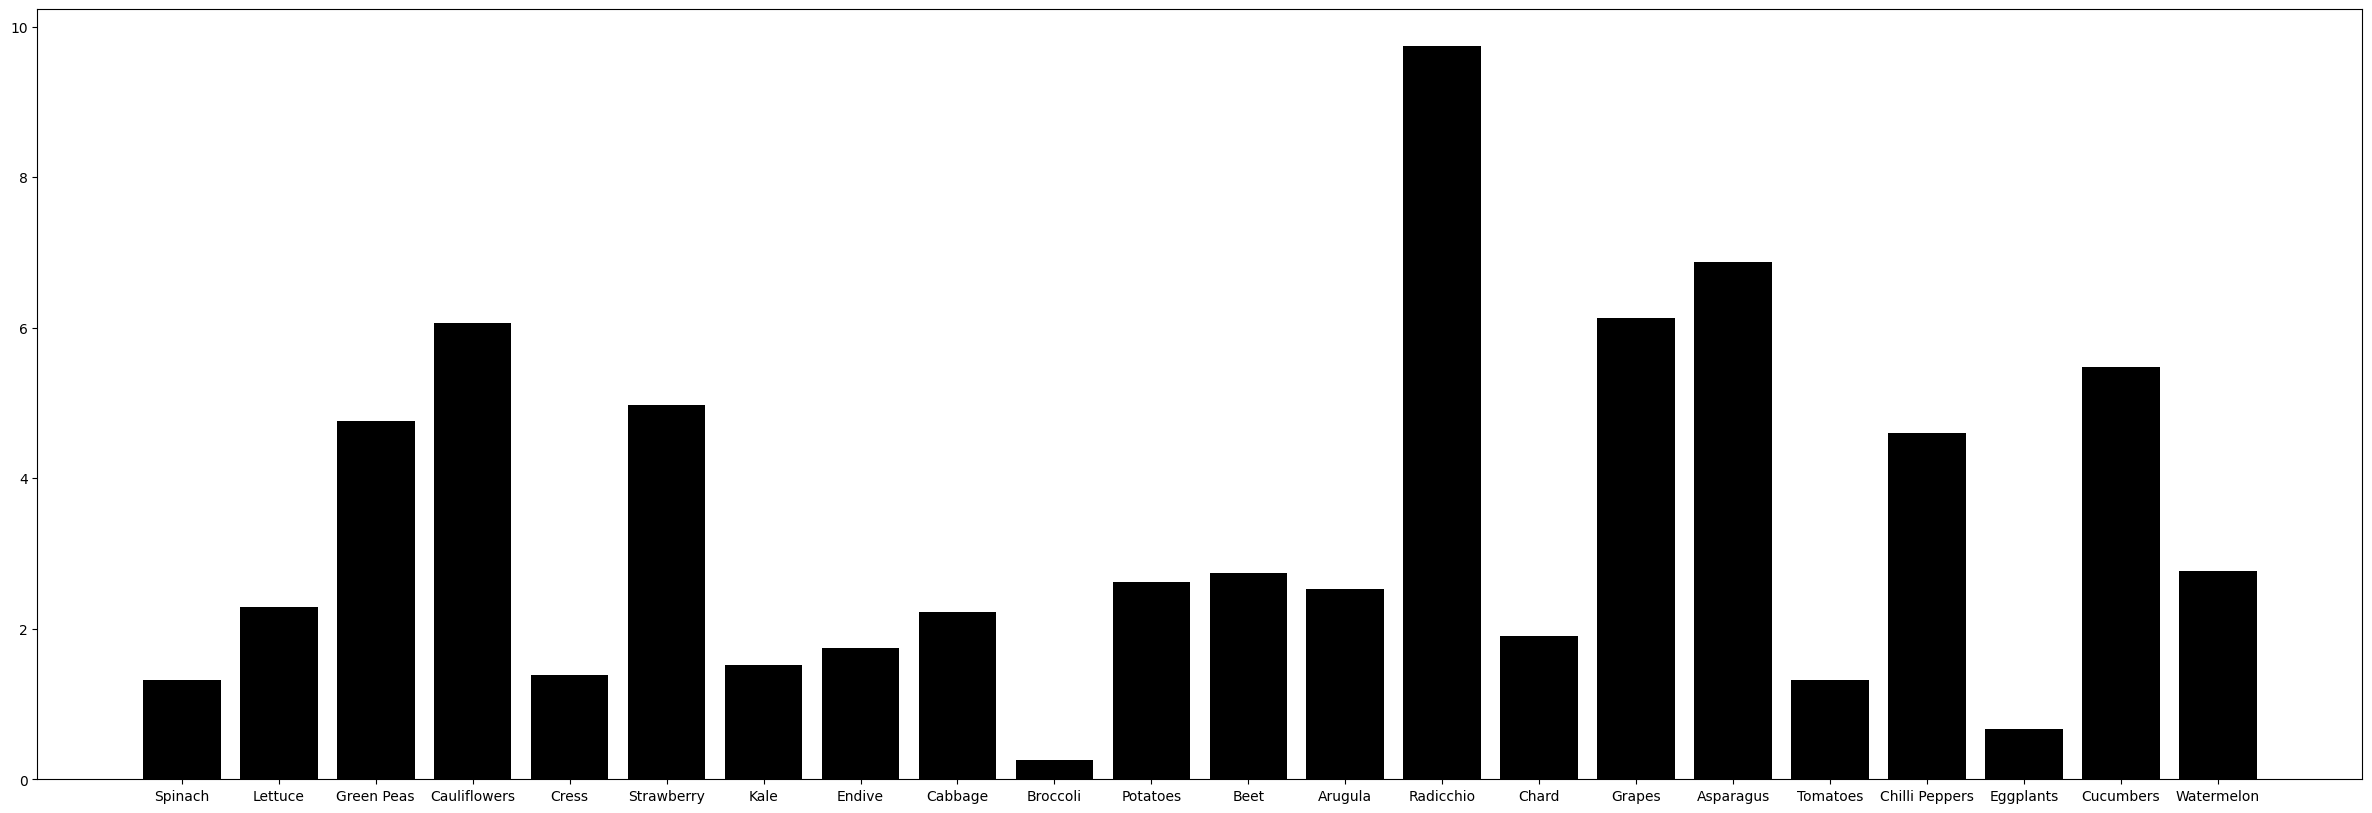

In [ ]:
# Plot graphic with bar
plt.figure(figsize=(30,20))
plt.bar(info_temp_veg["Name"],info_temp_veg["max"],color="green")
plt.bar(info_temp_veg["Name"],info_temp_veg["mean"],color="blue")
plt.bar(info_temp_veg["Name"],info_temp_veg["min"],color="red")
plt.show()

plt.figure(figsize=(30,10))
plt.bar(info_temp_veg["Name"],info_temp_veg["var"],color="black")
plt.show()

In [ ]:
# Plota diversos gráficos referentes a dados sobre diversas verduras e seus respectivos dados


,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,Green Peas,Moderate,Short Day Period,18.237489,1079.572958,6.777649,6.913269,314.935840,65.057374,150.515721,48.860186,124.688035,4.977256,neutral,Sandy,Fall,5.0,10.0,10.0
15396,Green Peas,Moderate,Short Day Period,16.603638,958.201820,5.839441,6.829060,345.860296,66.747340,144.310767,44.647790,121.589160,4.987133,neutral,Sandy,Fall,5.0,10.0,10.0
15397,Green Peas,Moderate,Short Day Period,12.154144,947.899222,6.499094,6.938902,320.293737,65.803531,147.068405,42.351771,120.392912,5.043142,low_acidic,Sandy,Fall,5.0,10.0,10.0
15398,Green Peas,Moderate,Short Day Period,17.493029,863.902923,5.940159,6.778806,300.501265,64.563183,144.416616,44.405726,119.291683,4.687349,low_acidic,Sandy,Spring,5.0,10.0,10.0


## Relationship between pH and type of vegetable

In [ ]:
ph_dataset = df_name["pH"].agg(["mean","median","min","max", "var"]).reset_index().sort_values(by="mean")
ph_dataset

,Name,mean,median,min,max,var
16,Potatoes,5.608170,5.611564,4.888871,6.239425,0.039498
14,Kale,5.695243,5.695102,5.392127,6.004428,0.010016
20,Tomatoes,6.152229,6.158353,5.474735,6.973685,0.047863
10,Eggplants,6.152238,6.152676,5.376886,6.759872,0.048037
7,Chilli Peppers,6.159060,6.150475,5.535626,6.951923,0.048885
13,Green Peas,6.249712,6.253125,5.438930,7.029409,0.066934
1,Asparagus,6.354111,6.352897,5.975514,6.730349,0.014276
19,Strawberry,6.410108,6.414217,6.019542,6.834445,0.018262
3,Broccoli,6.494341,6.487695,5.976930,7.124730,0.028244
8,Cress,6.496990,6.494297,5.949041,7.056002,0.027187


from matplotlib import pyplot as plt
ph_dataset['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset.plot(kind='scatter', x='median', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset.plot(kind='scatter', x='max', y='var', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean']
  ys = series['median']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ph_dataset.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('median')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ph_dataset.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean']
  ys = series['max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ph_dataset.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean']
  ys = series['var']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ph_dataset.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('var')

from matplotlib import pyplot as plt
ph_dataset['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ph_dataset['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

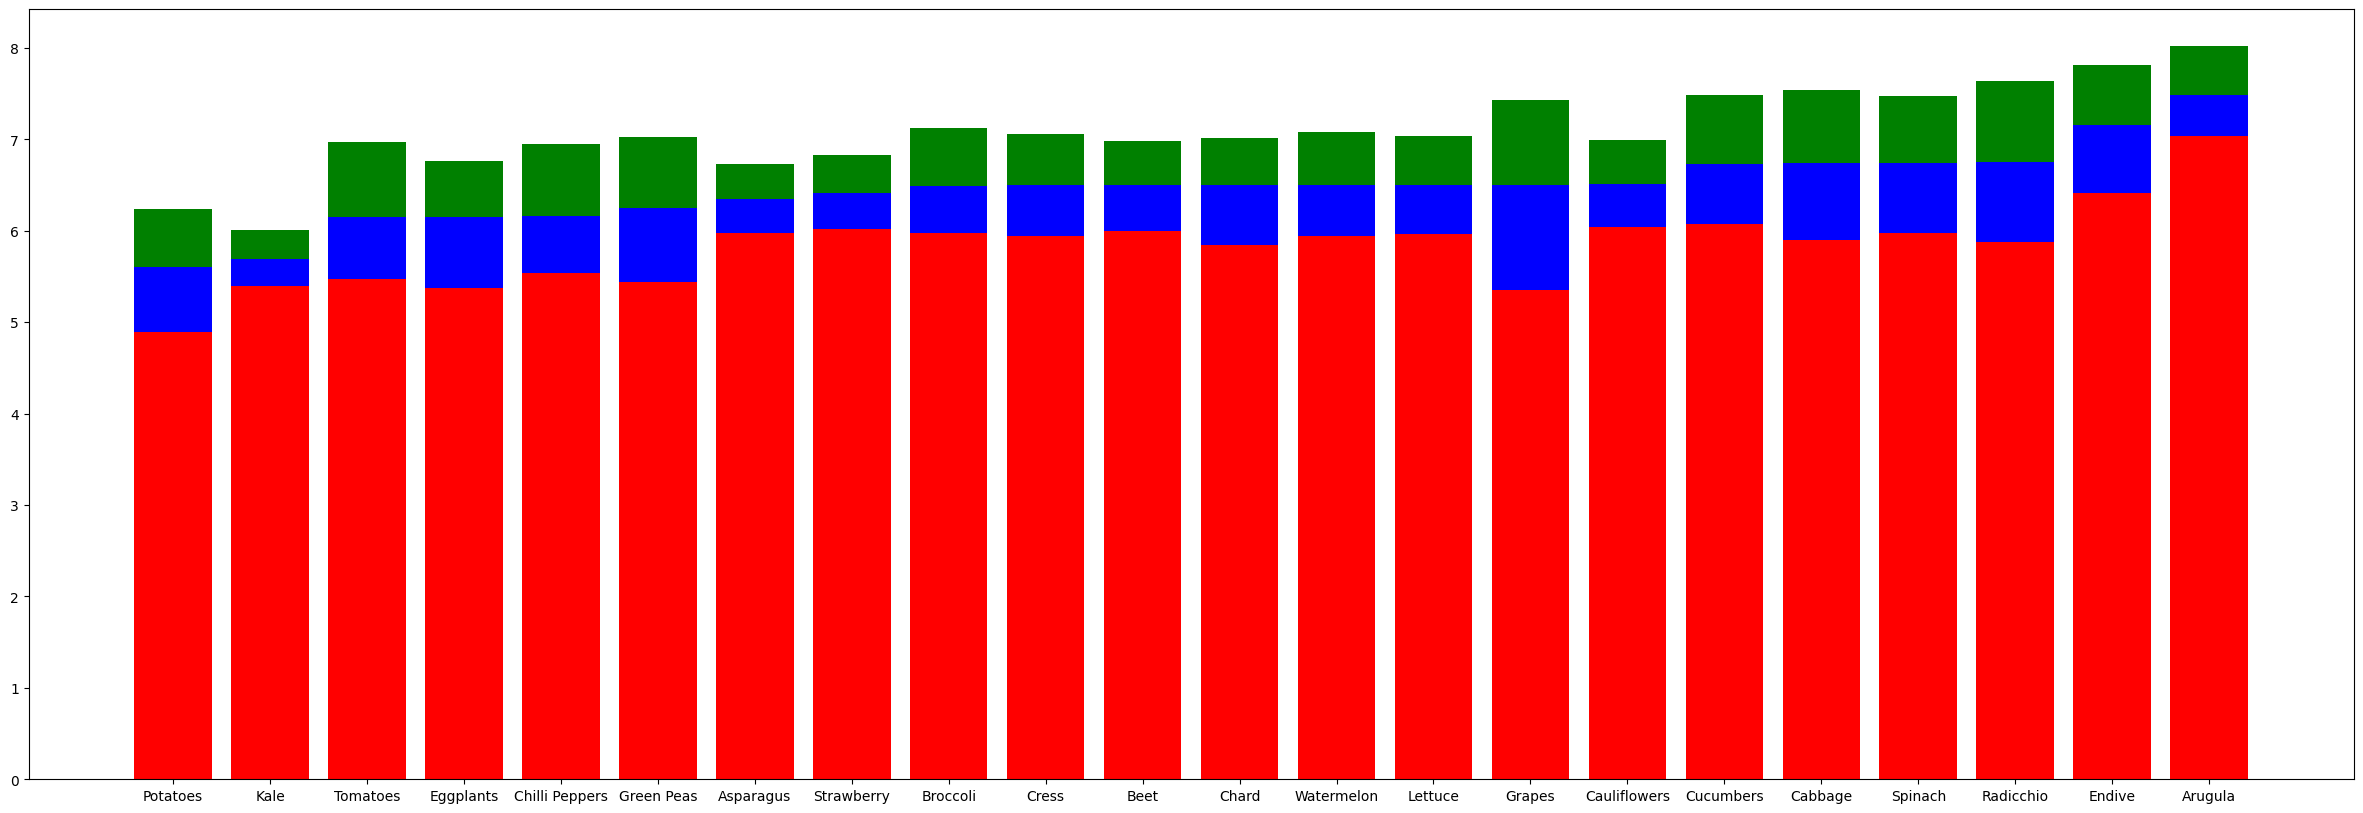

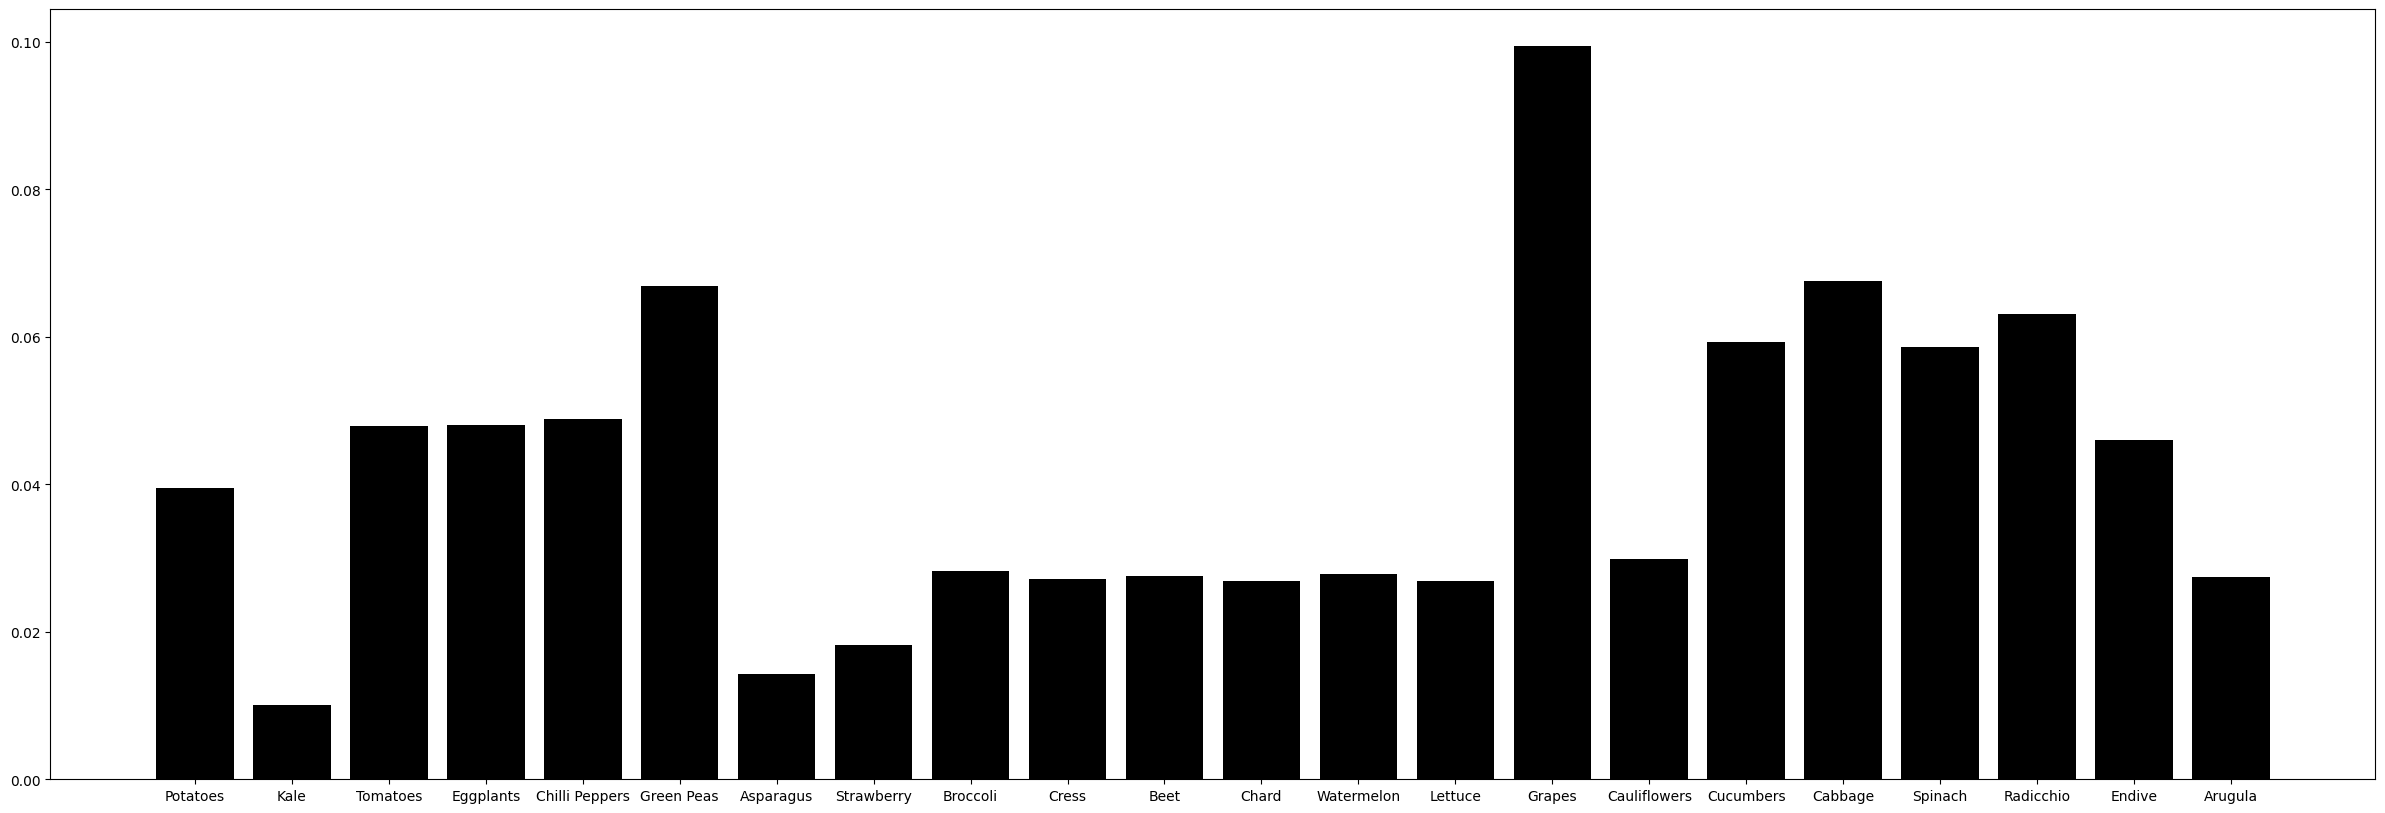

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(ph_dataset["Name"],ph_dataset["max"],color="green")
plt.bar(ph_dataset["Name"],ph_dataset["mean"],color="blue")
plt.bar(ph_dataset["Name"],ph_dataset["min"],color="red")
plt.show()

plt.figure(figsize=(30,10))
plt.bar(ph_dataset["Name"],ph_dataset["var"],color="black")
plt.show()